# Computer Project #2

A cylindrical fuel rod of radius $R$ is cooled by fluid around it, with heat transfer coefficient $h$. Consider the rod to be infinite in the $z$ direction. The bulk coolant temperature is $T_{b0}$. The fuel element is made of UO2 ($R=0.5$ cm). Density = 10.75 g/cm^3, k = 2 W/(m-K), Cp = 84 J/(mol-K).

## ANALYTICAL SOLUTION

(a) Find the steady-staate temperature distribution for $t<0$, $T_{i}(r)$, in the fuel rod due to ta sparially uniform heat generation term of $\dot{q}_{0}$ (W/cm^3). What value of $\dot{q}_{0}$ (in kW/m^3) will lead to the maximum temperature in the fuel rod to be 700 C?  

Use the value of $\dot{q}_{0}$ in the rest of this project. Plot temperature of the radial coodinate.

(answer)  
From given problem statement, we first need to consider the steady state. The heat conduction equation at the steady state is described as
$$
\frac{1}{r}\frac{d}{dr}(r \frac{dT}{dr}) + \frac{\dot{q}_{0}}{k} = 0
$$
where boundary conditions:
$$
\text{BC1 (symmetry) : } T = finite \text{ at } r =0 
$$

$$
\text{BC2 (convection) : } -k \frac{dT}{dr}|_{r=R} = h(T(R)-T_{b0})
$$


Solve for $T(r)$:
$$
\begin{align*}
 \frac{1}{r}\frac{d}{dr}(r \frac{dT}{dr}) + \frac{\dot{q}_{0}}{k} &= 0\\ 
 \frac{1}{r}\frac{d}{dr}(r \frac{dT}{dr}) &= -  \frac{\dot{q}_{0}}{k}\\
 \frac{d}{dr}(r \frac{dT}{dr}) &= - \frac{\dot{q}_{0}r}{k}
\end{align*}
$$

Integrate both hand sides for $r$:

$$
\begin{align*}
 r \frac{dT}{dr} &= - \frac{\dot{q}_{0}r^2}{2k} + C_{1}\\
 \frac{dT}{dr} &= - \frac{\dot{q}_{0}r}{2k} + \frac{C_{1}}{r}
\end{align*}
$$

Integrate both hand sides again:

$$
    T(r) = - \frac{\dot{q}_{0}r^2}{4k} + C_{1}\ln{r} + C_{2}
$$

From the BC1, the coefficient $C_{1} = 0$. Hence,
$$
T(r) = - \frac{\dot{q}_{0}r^2}{4k} + C_{2}
$$

Apply the BC2, the $C_{2}$ is expressed as:
$$
C_{2} = \frac{\dot{q}_{0}R}{2h} + \frac{\dot{q}_{0}R^2}{4k} + T_{b0}
$$

Therefore, $T(r)$ is

$$
T(r) = -\frac{\dot{q}_{0}r^2}{4k} +  \frac{\dot{q}_{0}R}{2h} + \frac{\dot{q}_{0}R^2}{4k} + T_{b0}
$$

Since the geometry is a cylindrical and the heat generation is uniform, the centerline ($r=0$) goes to the maximum temperature.  
Substitute $r=0$ and $T(r=0)=700$ C for finding $\dot{q}_{0}$:

$$
(-\frac{R}{2h} + \frac{R^2}{4k})\dot{q}_{0} = T(r=0) - T_{b0} (=400)
$$

Solve for $\dot{q}_{0}$:
$$
\dot{q}_{0} = 125764.2 \text{  ($\rm kW/m^3$) }
$$

The following cells show the plot of the temperature distribution.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
''' 
define given parameters
'''
R = 0.5 # radius of fuel [cm]
rho = 10.75 # density of fuel [kg/m^3]
k = 0.02 # thermal conductivity of fuel [W/m-K]
cp = 84 * 1/270.03 # specific heat of fuel [J/g-K]

h = 4.5 # [W/m^2-K]
Tb0 = 300 # [K]
q0 = 125  # [W/cm^3]

tau, m = 0.02, 0.02

In [ ]:
# T(r) = -\frac{\dot{q}_{0}r^2}{4k} +  \frac{\dot{q}_{0}R}{2h} + \frac{\dot{q}_{0}R^2}{4k} + T_{b0}
def T(r):
    return -q0 * r**2 / (4*k) + q0 * R / (2*h) + q0 * R**2 / (4*k) + Tb0

# plot T(r) vs r
r = np.linspace(0, R, 100)
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.plot(r, T(r), 'k-')
ax.set_xlabel('r [cm]')
ax.set_ylabel('T [K]')
ax.set_title('Steady-state Temperature Distribution')
ax.grid(True)
ax.set_xlim(0, R)
plt.show()

(b) Assuming $h$ remains constant, the heat generation rate and the bulk coolant temperature start to change at $t=0$ with time as $\dot{q}(t)$ and $T_{b}(t)$. For $t>0$, find the anauytical expression for the temperature distribution in the fuel rod $T(r,t)$. Use the temperature distribution found in part (a) as your initial condition at $t=0$.

A cylindrical fuel rod of radius R is cooled by fluid around it, with heat transfer coefficient h. Consider
the rod to be infinite in the z direction. The bulk coolant temperature is Tb0. The fuel element is made
of UO2 (R = 0.5 cm). [Density = 10.75 g/cm3; k = 2 W/(m‐K); Cp = 84 J/(mol‐K)]. Pay attention to the
units.

$$
\dot{q}(t) = \frac{\dot{q}_{0}}{2}(1 + e^{- \eta t})
$$

$$
\dot{T}_{b}(t) = \frac{T_{b0}}{2}(1 + e^{- m t})
$$

## B. NUMERICAL SOLUTION

Now, solve the problem numerically using a finite difference scheme (central difference for space, and explicit
in time). Show your work and include your computer code in an Appendix.

### (a) For the numerical solution obtained using an explicit finite difference method (for m = η = 0.02)

(i) Carry out a systematic study of the effects of the grid size and the time step on the accuracy of the solution. Devise a strategy to convince the reader that the number of grid points you are using is adequate but not an overkill. Implement the strategy and report your results. [Carry out a mesh refinement study to determine an adequate grid size.]

(ii) Also, convince the reader that the time step you used for each solution is small enough but not
unnecessarily small. [Carry out a time step refinement study to determine adequate time steps for
each simulation.]

(iii) Plot the converged analytical and numerical solutions for each ti and compare them.

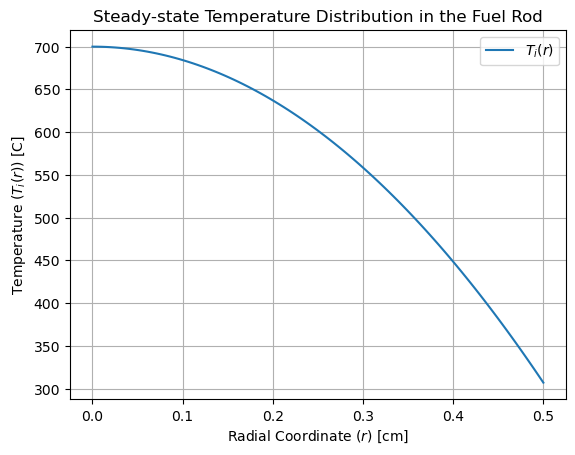

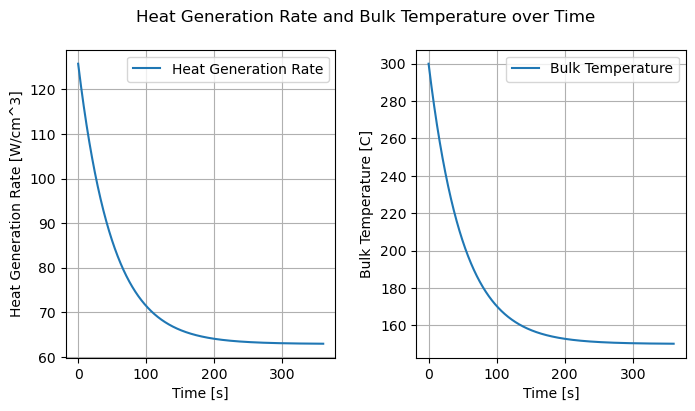

Nr=30: RMSE=26.091154572390707, MAE=17.892518860538193, dr=0.0167, dt=0.0002
Nr=50: RMSE=9.880545034260214, MAE=6.5467866538841575, dr=0.0100, dt=0.0002
Nr=70: RMSE=4.124532892365632, MAE=2.693695451190072, dr=0.0071, dt=0.0002
Nr=90: RMSE=2.261143925497651, MAE=1.466823062545936, dr=0.0056, dt=0.0002
Nr=120: RMSE=1.9524077265415387, MAE=1.2590035436782605, dr=0.0042, dt=0.0002
Nr=150: RMSE=1.1633318671532304, MAE=0.7476831122731828, dr=0.0033, dt=0.0002
Nr=320: RMSE=2.4360473753472887, MAE=1.5563445645305938, dr=0.0016, dt=0.0002


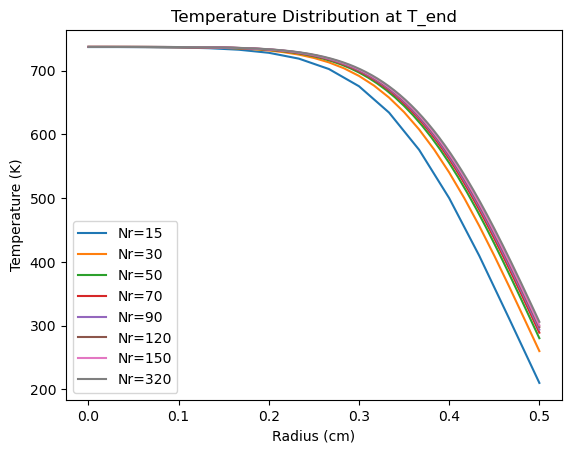

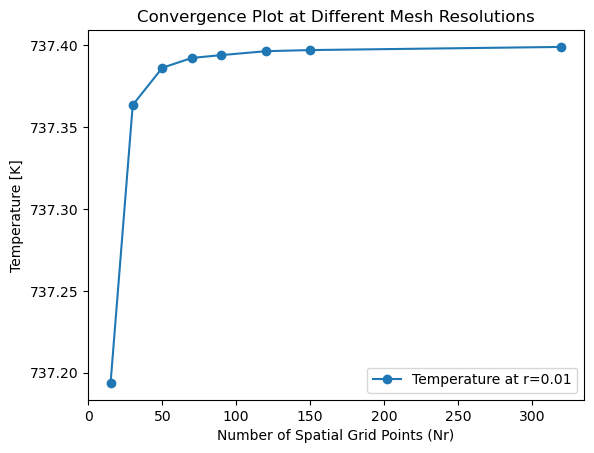

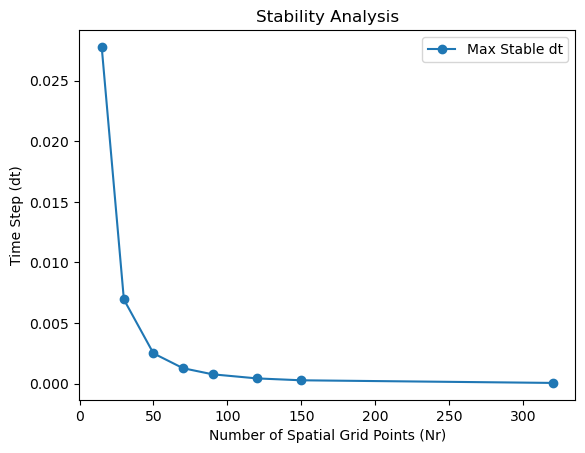

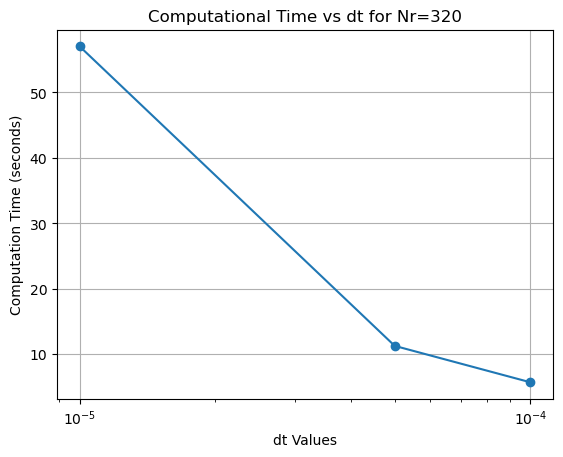

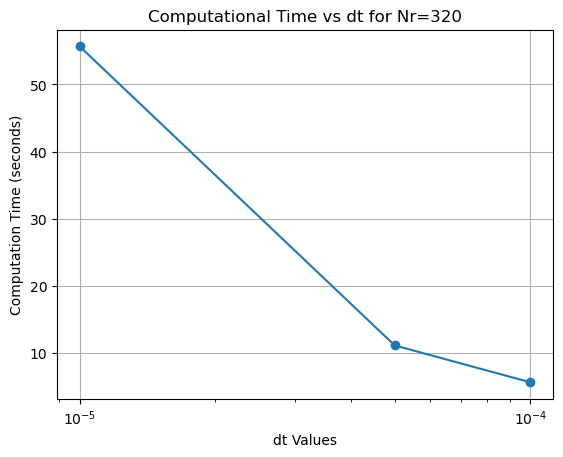

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import time

# Given parameters
T_max = 700  # [C]
R = 0.5  # radius of fuel [cm]
rho = 10.75  # density of fuel [g/cm^3]
k = 0.02  # thermal conductivity of fuel [W/cm-K]
cp = 0.3110765  # specific heat of fuel [J/g-K]
q_dot_0 = 125.76  # heat generation rate [W/cm^3]
h = 4.5  # convection coefficient [W/cm^2-K]
Tb0 = 300  # initial bulk temperature [K]
m = 0.02 # parameter for bulk temperature 
initial_cylinder_temp = 700  # initial cylinder temperature [K]
eta = 0.02 # parameter for heat generation

# Radial coordinates
r = np.linspace(0, R, 100)

# Steady-state temperature distribution
T_i = -(q_dot_0 * r**2) / (4 * k) + T_max

# Plotting
plt.plot(r, T_i, label=r'$T_i(r)$')
plt.xlabel('Radial Coordinate ($r$) [cm]')
plt.ylabel('Temperature ($T_i(r)$) [C]')
plt.title('Steady-state Temperature Distribution in the Fuel Rod')
plt.legend()
plt.grid(True)
plt.show()


# EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE


# Numerical Analysis

# Heat generation rate function [W/cm^3]
def q(q_dot_0, eta, t):
    """Calculate the heat generation rate over time."""
    return q_dot_0 * 0.5 * (1 + np.exp(-eta * t))

# Bulk temperature function [C]
def Tb(Tb0, m, t):
    """Calculate the bulk temperature over time."""
    return Tb0 * 0.5 * (1 + np.exp(-m * t))

# Plotting heat generation rate and bulk temperature over time
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

t_values = np.linspace(0, 360, 5000)
ax[0].plot(t_values, q(q_dot_0, eta, t_values), label='Heat Generation Rate')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Heat Generation Rate [W/cm^3]')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(t_values, Tb(Tb0, m, t_values), label='Bulk Temperature')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Bulk Temperature [C]')
ax[1].grid(True)
ax[1].legend()

fig.suptitle('Heat Generation Rate and Bulk Temperature over Time')
plt.show()


# Heat generation rate as a function of time
def q(q_dot_0, eta, t):
    return q_dot_0 * 0.5 * (1 + np.exp(-eta * t))

# Bulk temperature as a function of time
def Tb(Tb0, m, t):
    return Tb0 * 0.5 * (1 + np.exp(-m * t))

# Finite difference solution

def solve_heat_equation(Nr, Nt, T_end):
    dr = R / Nr
    dt = T_end / Nt
    r_values = np.linspace(0, R, Nr + 1)
    t_values = np.linspace(0, T_end, Nt + 1)

    # Initialize T using zeros
    T = np.full((Nr + 1, Nt + 1), initial_cylinder_temp, dtype=np.float64)

    for n in range(0, Nt):
        for i in range(1, Nr):
            # Finite difference scheme
            T[i, n + 1] = T[i, n] + dt * (
                k / (rho * cp) * ((T[i + 1, n] - 2 * T[i, n] + T[i - 1, n]) / dr**2 + 1 / r_values[i] * (T[i + 1, n] - T[i - 1, n]) / (2 * dr)) + 
                q(q_dot_0, eta, t_values[n]) / (rho * cp)
            )
        # Boundary conditions
        T[0, n + 1] = T[1, n + 1]
        T[Nr, n + 1] = T[Nr - 1, n + 1] + dr * h / k * (Tb(Tb0, m, t_values[n + 1]) - T[Nr - 1, n + 1])

    return r_values, t_values, T, dr, dt

# Error metric functions
def rmse(T1, r1, T2, r2):
    interpolate_T1 = interp1d(r1, T1, kind='linear', fill_value="extrapolate")
    T1_interpolated = interpolate_T1(r2)
    return np.sqrt(np.mean((T1_interpolated - T2) ** 2))

def mae(T1, r1, T2, r2):
    interpolate_T1 = interp1d(r1, T1, kind='linear', fill_value="extrapolate")
    T1_interpolated = interpolate_T1(r2)
    return np.mean(np.abs(T1_interpolated - T2))

# Mesh refinement study with error metrics
def mesh_refinement_study(Nr_values=None, Nt=5000, T_end=1):

    previous_T = None
    previous_r_values = None
    for Nr in Nr_values:
        r_values, t_values, T, dr, dt = solve_heat_equation(Nr, Nt, T_end)
        plt.plot(r_values, T[:, -1], label=f'Nr={Nr}')

        if previous_T is not None:
            diff_rmse = rmse(previous_T[:, -1], previous_r_values, T[:, -1], r_values)
            diff_mae = mae(previous_T[:, -1], previous_r_values, T[:, -1], r_values)
            print(f'Nr={Nr}: RMSE={diff_rmse}, MAE={diff_mae}, dr={dr:.4f}, dt={dt:.4f}')

        previous_T = T
        previous_r_values = r_values

    plt.xlabel('Radius (cm)')
    plt.ylabel('Temperature (K)')
    plt.title('Temperature Distribution at T_end')
    plt.legend()
    plt.show()

mesh_refinement_study(Nr_values = [15, 30, 50, 70, 90, 120, 150, 320], Nt=5000, T_end=1)


# Example of convergence plot
Nr_values = [15, 30, 50, 70, 90, 120, 150, 320]
Nt = 5000
T_end = 1

# Choose the radial coordinate for convergence comparison
convergence_radius = 0.01

# Initialize arrays to store temperatures at the chosen radial coordinate for each Nr
temperature_at_convergence = []

for Nr in Nr_values:
    r_values, t_values, T, _, _ = solve_heat_equation(Nr, Nt, T_end)
    
    # Find the index corresponding to the chosen radial coordinate
    r_index = np.abs(r_values - convergence_radius).argmin()
    
    # Store the temperature at the chosen radial coordinate for the last time step
    temperature_at_convergence.append(T[r_index, -1])

# Plot the convergence results
plt.plot(Nr_values, temperature_at_convergence, marker='o', linestyle='-', label=f'Temperature at r={convergence_radius}')
plt.xlabel('Number of Spatial Grid Points (Nr)')
plt.ylabel('Temperature [K]')
plt.title('Convergence Plot at Different Mesh Resolutions')
plt.legend()
plt.show()

# Example of stability analysis plot
Nr_values = [15, 30, 50, 70, 90, 120, 150, 320]
max_stable_dt_values = []  # Populate this list with max stable dt for each Nr
# Implement the stability analysis function calculate_max_stable_dt
def calculate_max_stable_dt(Nr):
    # CFL number (adjust as needed, typically a fraction like 0.5)
    CFL = 0.5

    # Spatial grid spacing
    dr = R / Nr

    # Maximum stable time step based on CFL condition
    max_stable_dt = CFL * dr**2 / k

    return max_stable_dt
for Nr in Nr_values:
    max_stable_dt = calculate_max_stable_dt(Nr)  # Implement a function to calculate max stable dt
    max_stable_dt_values.append(max_stable_dt)

plt.plot(Nr_values, max_stable_dt_values, marker='o', linestyle='-', label='Max Stable dt')
plt.xlabel('Number of Spatial Grid Points (Nr)')
plt.ylabel('Time Step (dt)')
plt.title('Stability Analysis')
plt.legend()
plt.show()

# Any number past Nr_value = 320 will result in overflow. 


# Updated function to study the effect of dt with computation time
def study_dt_effect(Nr_fixed, dt_values, T_end):


    computation_times = []  # To store computation times for each dt

    for dt in dt_values:
        Nt = int(T_end / dt)  # Calculate the number of time steps based on dt

        # Measure computation time
        start_time = time.time()
        _, _, _, _, _ = solve_heat_equation(Nr_fixed, Nt, T_end)
        end_time = time.time()
        computation_time = end_time - start_time
        computation_times.append(computation_time)

    # Plot dt_values vs computational time
    plt.plot(dt_values, computation_times, marker='o', linestyle='-')
    plt.xlabel('dt Values')
    plt.ylabel('Computation Time (seconds)')
    plt.xscale('log')
    plt.title(f'Computational Time vs dt for Nr={Nr_fixed}')
    plt.grid(True)
    plt.show()

# Example usage
Nr_fixed = 320
dt_values = [0.0001, 0.00005, 0.00001]  # Specify the dt values you want to investigate
study_dt_effect(Nr_fixed, dt_values, T_end=1)
